# CS 109B - Course Project - Team 14
## Deep Learning - Posters

## 1. Prepare AWS

#### Install packages

In [1]:
import pip
def install(package):
    pip.main(['install', package])
install('boto')
install('opencv-python')
install('h5py')
install('scikit-image')

  Using cached boto-2.46.1-py2.py3-none-any.whl


You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


  Using cached opencv_python-3.2.0.7-cp35-cp35m-manylinux1_x86_64.whl
  Using cached numpy-1.12.1-cp35-cp35m-manylinux1_x86_64.whl


You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


  Using cached h5py-2.7.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached six-1.10.0-py2.py3-none-any.whl
  Using cached numpy-1.12.1-cp35-cp35m-manylinux1_x86_64.whl


You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


  Using cached scikit_image-0.13.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached matplotlib-2.0.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached six-1.10.0-py2.py3-none-any.whl
  Using cached PyWavelets-0.5.2-cp35-cp35m-manylinux1_x86_64.whl
  Using cached networkx-1.11-py2.py3-none-any.whl
  Using cached scipy-0.19.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached Pillow-4.1.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached python_dateutil-2.6.0-py2.py3-none-any.whl
  Using cached numpy-1.12.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached pytz-2017.2-py2.py3-none-any.whl
  Using cached decorator-4.0.11-py2.py3-none-any.whl
  Using cached olefile-0.44.zip


Could not import setuptools which is required to install from a source distribution.
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/req/req_install.py", line 377, in setup_py
    import setuptools  # noqa
  File "/usr/share/python-wheels/setuptools-20.7.0-py2.py3-none-any.whl/setuptools/__init__.py", line 11, in <module>
    from setuptools.extern.six.moves import filterfalse, map
  File "/usr/share/python-wheels/setuptools-20.7.0-py2.py3-none-any.whl/setuptools/extern/__init__.py", line 1, in <module>
    from pkg_resources.extern import VendorImporter
ImportError: No module named 'pkg_resources.extern'

You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## 2. Load Data

#### Load packages and set display options

In [2]:
import numpy as np
import pandas as pd
import os

from __future__ import print_function
import cv2 
from scipy import ndimage, misc
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.metrics import hamming_loss

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, ZeroPadding2D
from keras.layers.normalization import BatchNormalization

from keras.optimizers import SGD, Adam
from keras.initializers import he_normal
from keras import regularizers
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display, HTML, Markdown
%matplotlib inline
plt.style.use('ggplot') 
def printmd(string):
    display(Markdown(string))

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


#### Set global constants

In [3]:
# input image dimensions
img_rows, img_cols = 128, 128

# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 128

# 18 genres in our data set
num_classes = 22

# number of iterations over the complete training data
epochs = 50

#(80,75) equivilant to test 20 , train 60, validate 20
train_percent = 80
validation_percent = 75   #note: percentage of training not the entire set 

#### Load and clean Y data

In [4]:
movie_fields = ['imdb_id',
                'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
                'Family','Fantasy','Film-Noir','History','Horror','Music', 'Musical', 'Mystery',
                'Romance','Sci-Fi','Sport', 'Thriller','War','Western', 'News']

genres = movie_fields[1:]
small_genres = ['Western', 'Musical', 'Music', 'History', 'Animation', 'War', 'History', "Sci-Fi"]

#ignore ,'Game-Show','News','Reality-TV', 'Biography','Adult','Film-Noir'
df_im_0 = pd.read_csv( './imdb_movies_trim.csv',
                    encoding = 'utf-8',
                    usecols = movie_fields)



In [5]:
small_genres = []
sample_threshold = 2000

## Randomly sample 2000 movies from each genre and 
## capture all genres that have less than 2000 movies for augmentation
for i in range(len(genres)):
    #print(genres[i])
    df = df_im_0.loc[df_im_0[genres[i]] == 1]
    #print(df.shape[0])
    if(df.shape[0] > sample_threshold):
        tempdf = df.sample(n = sample_threshold)
        #print(tempdf.shape[0])
        if(i == 0):
            finaldf = tempdf
        elif(i > 0):
            finaldf = finaldf.append(tempdf)
            #print(finaldf.shape[0])
    else:
        small_genres.append(genres[i])
print(small_genres)
print(finaldf.shape)

['Animation', 'Film-Noir', 'History', 'Music', 'Musical', 'Sport', 'War', 'Western', 'News']
(26000, 23)


In [6]:
## Shuffle the dataset
finaldf = finaldf.sample(frac=1).reset_index(drop=True)
## Remove the duplicates
finaldf = finaldf.drop_duplicates(subset="imdb_id")
print(finaldf.shape)

for i in range(len(genres)):
    df = finaldf.loc[finaldf[genres[i]] == 1]
    print(genres[i], df.shape[0])

(18628, 23)
Action 3809
Adventure 3097
Animation 1297
Comedy 5832
Crime 3518
Documentary 2100
Drama 8024
Family 2262
Fantasy 2369
Film-Noir 244
History 658
Horror 3045
Music 609
Musical 622
Mystery 2454
Romance 3782
Sci-Fi 2442
Sport 400
Thriller 5135
War 645
Western 328
News 84


In [7]:
# filter out no-genre movies
finaldf_ = finaldf[finaldf.iloc[:, 1:].any(axis = 1)] 

#reorder the columns
finaldf_ = finaldf_[movie_fields]

#sort by movie id
finaldf_ = finaldf_.sort_values(by = 'imdb_id')

# prep for augmentation
small_genres_idx = []
for i in range(len(small_genres)):
    small_genres_idx.append(movie_fields.index(small_genres[i]))

small_genres_idx

[3, 10, 11, 13, 14, 18, 20, 21, 22]

## 3. Load and Prepare Images

#### Load and resize images

In [8]:
images = []
imdb_ids = []
imdb_id_image_not_found = []

num_images = finaldf_.shape[0]
for i in range(num_images):
    
    # retrieve movie object from imdb
    imdb_id = int(finaldf_.iloc[i,0])
    filepath = './Posters_250_250/' + str(imdb_id).zfill(7) + '.jpg'
    # image found, so load, resize, and collect it
    if os.path.isfile(filepath) :
        image = cv2.imread(filepath)
        image = cv2.resize(image,(img_rows, img_cols))
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # needed if loading images with scikit-image
        image = np.array(image).reshape((3, img_rows, img_cols))
        
        # add image and movie id to list
        images.append([image])
        imdb_ids.append(imdb_id)
        
        # image augmentation on minority genres
        if sum(finaldf_.iloc[i, small_genres_idx]) >= 1 :
             for i in range(10):
                image_flip = cv2.flip(image, 1) # vertical-axis flip
                images.append([image_flip])
                imdb_ids.append(imdb_id)
    else:
        # add id to failure list
        imdb_id_image_not_found.append(imdb_id)
        
# collect the image list into an array
x = np.array(images) 
x = x[:, 0, :, :]
images = None
df_imdb_ids = pd.DataFrame({'id': imdb_ids })

print()
print ('images loaded', len(imdb_ids))
print ('images failed', len(imdb_id_image_not_found))


images loaded 60913
images failed 5


#### Split into test and train data sets

In [9]:
#Build y taking care to align rows with x
#merge ensures that if images were not found they do not cause a mis-aslignment of x and y
y = pd.merge(left = df_imdb_ids , right = finaldf_ , left_on = 'id', right_on = 'imdb_id')

#drop first two columns (id and imdb_id) leaving just the 18 encoded genres
y = y.ix[:,2:]

#split y into test and train
y_train, y_test = sk_split(y, train_size = train_percent / 100.0)

#take out a portion for validation from the training set
y_train, y_valid = sk_split(y_train, train_size = validation_percent / 100.0)

#use post split indicies from y to split x into the same groups
x_test   = x[y_test.index]
x_train  = x[y_train.index]
x_valid  = x[y_valid.index]

#convert label dataframes to numpy arrays
y_train = y_train.values
y_test  = y_test.values
y_valid = y_valid.values

print()
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:' , x_test.shape)
print()
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('y_test shape:' , y_test.shape)


#free up memory
x = y = None


x_train shape: (36547, 3, 128, 128)
x_valid shape: (12183, 3, 128, 128)
x_test shape: (12183, 3, 128, 128)

y_train shape: (36547, 22)
y_valid shape: (12183, 22)
y_test shape: (12183, 22)


#### Using tensorflow as backend so expect order of array as is (n = sample size, img_rows, img_cols, colour = 3)

In [10]:
if K.image_data_format() ==  'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

#### Centre and normalise images

In [11]:
# normalize image values to [0,1] (Keras sample code doesn't center)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_valid /= 255
x_test /= 255

print()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (36547, 128, 128, 3)
36547 train samples
12183 test samples


## 4. Train Model

#### Create dictionary of class weights

In [12]:
# create dictionary of class weights
class_count = y_train.sum(axis = 0) + 1
class_weight = y_train.shape[0] / (num_classes * class_count)
class_weight_dict = dict(zip(np.arange(num_classes), class_weight))

#### Create model shell

In [13]:
# create an empty network model
model = Sequential()


# --- input layer ---
model.add(Dropout(0.2, input_shape = input_shape))
# Use a 3,3 filter with 1,1 stride with padding [if necessary]. The conv layer is initialized using Relu
model.add(Conv2D(16, kernel_size = (3, 3), strides = (1,1), padding= 'valid', 
                 activation = 'relu', kernel_initializer= he_normal(seed=None)))
# Use a 3,3 filter with 1,1 stride with padding [if necessary]. The conv layer is initialized using Relu
model.add(Conv2D(16, kernel_size = (3, 3), strides = (1,1), padding= 'valid', 
                 activation = 'relu', kernel_initializer= he_normal(seed=None)))

# Batch Normalization to handle higher learning rates and initialization errors
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros',
                             gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones',
                             beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))



# --- max pool ---
model.add(MaxPooling2D(pool_size = (2, 2)))

# --- next layer ---
model.add(Dropout(0.2))
# Use a 3,3 filter with 1,1 stride with padding [if necessary]. The conv layer is initialized using Relu
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1,1), padding= 'valid', 
                 activation = 'relu', kernel_initializer= he_normal(seed=None)))
# Use a 3,3 filter with 1,1 stride with padding [if necessary]. The conv layer is initialized using Relu
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1,1), padding= 'valid',
                 activation = 'relu', kernel_initializer= he_normal(seed=None)))
# Batch Normalization to handle higher learning rates and initialization errors
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros',
                             gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones',
                             beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


# --- max pool ---
model.add(MaxPooling2D(pool_size = (2, 2)))

# --- next layer ---
model.add(Dropout(0.2))
# Use a 3,3 filter with 1,1 stride with padding [if necessary]. The conv layer is initialized using Relu
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1,1), padding= 'valid', 
                 activation = 'relu', kernel_initializer= he_normal(seed=None)))
# Use a 3,3 filter with 1,1 stride with padding [if necessary]. The conv layer is initialized using Relu
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1,1), padding= 'valid', 
                 activation = 'relu', kernel_initializer= he_normal(seed=None)))
# Batch Normalization to handle higher learning rates and initialization errors
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros',
                             gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones',
                             beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


# --- max pool ---
model.add(MaxPooling2D(pool_size = (2, 2)))

# flatten for fully connected classification layer
model.add(Flatten())

# --- fully connected layer ---
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer= he_normal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer= he_normal(seed=None)))

# --- classification ---
model.add(Dense(num_classes, activation = 'sigmoid'))

# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        4640      
__________

#### Compile model

In [14]:
# use basic categorical crossentropy with stochastic gradient decent
# evaluate model in terms of accuracy
# lr : learning rate (start from 0.1 and move as low as 10^-6)
# momentum: start with .5 and tune to .9

adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
model.compile(loss = 'binary_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'], class_weight = class_weight_dict)

#### Train model and score with validation data

In [15]:
## Reduce the learning rate when val_loss plateaus over 5 epochs
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1,
                              patience = 5, min_lr = 0.000001)

## Stop the training when val_loss differs by 0.001 over 10 epochs
early_stop = EarlyStopping (monitor = 'val_loss', min_delta = .001, patience = 10, verbose = 0, mode = 'auto')

csv_logger = CSVLogger('training.log')

model_checkpoint = ModelCheckpoint(filepath = "./best_model.hdf5", monitor = 'val_loss', 
                                   verbose = 0, save_best_only = True, 
                                   save_weights_only = False, mode = 'auto', period = 1)

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = [reduce_lr, early_stop, csv_logger, model_checkpoint],
                    verbose = 1,
                    validation_data = (x_valid, y_valid), 
                    class_weight = class_weight_dict
                        )

/home/ubuntu/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 36547 samples, validate on 12183 samples
Epoch 1/50
36547/36547 [==============================] - 108s - loss: 0.0893 - acc: 0.8428 - val_loss: 0.5033 - val_acc: 0.8450

## 5. Score Model

In [16]:
### prepare metrics calculations

avg_tags_per_movie = y_train.sum(axis = 1).mean()
y_test_predict_proba = model.predict(x_test, verbose = 0)

threshold_accus = np.zeros(101)
tp_rate = np.zeros(101)
fp_rate = np.zeros(101)
hamming_losses = np.zeros(101)

for i in range(101):
    y_test_predict = y_test_predict_proba > i / 100.0
    threshold_accus[i] = (y_test == y_test_predict).sum() / float((num_classes * y_test.shape[0]))
    tp_rate[i] = ((y_test == 1) & (y_test_predict == 1)).sum() / float((num_classes * y_test.shape[0]))
    fp_rate[i] = ((y_test == 0) & (y_test_predict == 1)).sum() / float((num_classes * y_test.shape[0]))
    hamming_losses[i] = hamming_loss(y_test, y_test_predict)
    
opt_hamming_threshold = hamming_losses.argmin() / 100.0

/home/ubuntu/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


In [17]:
opt_hamming_threshold

0.53000000000000003

In [18]:
# score after training
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', round(score[0], 4))
print('Test accuracy:', round(score[1], 4))

Test loss: 0.3111
Test accuracy: 0.8855


In [19]:
y_test_predict = y_test_predict_proba > .5
test_accu = (y_test == y_test_predict).sum() / float((num_classes * y_test.shape[0]))
print('Test accuracy using probability threshold of 0.50 :', round(test_accu, 4))

Test accuracy using probability threshold of 0.50 : 0.8855


In [20]:
y_test_predict = y_test_predict_proba > opt_hamming_threshold
test_accu = (y_test == y_test_predict).sum() / float((num_classes * y_test.shape[0]))
print('Test accuracy using probability threshold of', round(opt_hamming_threshold, 2), ':', round(test_accu, 4))

Test accuracy using probability threshold of 0.53 : 0.8859


In [21]:
y_test_predict = np.zeros([y_test.shape[0], num_classes])
test_accu = (y_test == y_test_predict).sum() / float((num_classes * y_test.shape[0]))
print('Test accuracy using classifier that always predicts 0 :', round(test_accu, 4))

Test accuracy using classifier that always predicts 0 : 0.845


In [22]:
y_test_predict = y_test_predict_proba > opt_hamming_threshold
temp = pd.DataFrame(y_test_predict.sum(axis = 0), columns = ['Count'])
temp.index = genres
temp

,Count
Action,1048
Adventure,1266
Animation,1394
Comedy,1127
Crime,780
Documentary,2450
Drama,4522
Family,730
Fantasy,581
Film-Noir,258


In [24]:
from sklearn.metrics import precision_score as ps

y_test_predict = y_test_predict_proba > opt_hamming_threshold
avg_precision = ps(y_test, y_test_predict, average = 'samples')
print('Average test precision (samples):', round(avg_precision, 4))

Average test precision (samples): 0.5555


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.metrics import recall_score as rs

y_test_predict = y_test_predict_proba > opt_hamming_threshold
avg_recall = rs(y_test, y_test_predict, average = 'samples')
print('Average test recall (samples):', round(avg_recall, 4))

Average test recall (samples): 0.3932


In [26]:
y_test_predict_top_class = np.argmax(y_test_predict_proba, axis = 1)
test_top_class_accu_list = [(y_test[i, y_test_predict_top_class[i]] == 1) for i in range(y_test.shape[0])]
test_top_class_accu = np.sum(test_top_class_accu_list) / float(y_test.shape[0])
print('Test accuracy matching top class:', round(test_top_class_accu, 4))

Test accuracy matching top class: 0.6504


In [27]:
y_test_predict = y_test_predict_proba > 0.33
test_hamming_loss = hamming_loss(y_test, y_test_predict)
print('Test Hamming loss:', round(test_hamming_loss, 4))

Test Hamming loss: 0.1256


## 6. Visualization

### Training process

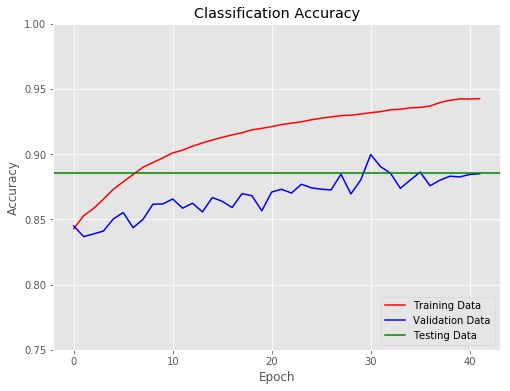

In [28]:
### plot training process
print()
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['acc'], color = 'red', label = 'Training Data')
ax.plot(history.history['val_acc'], color = 'blue', label = 'Validation Data')
ax.axhline(y = score[1], color = 'green', label = 'Testing Data')
ax.set_ylim(0.75, 1)
ax.legend(loc = 'lower right')
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Classification Accuracy")

plt.show()

### ROC Curve

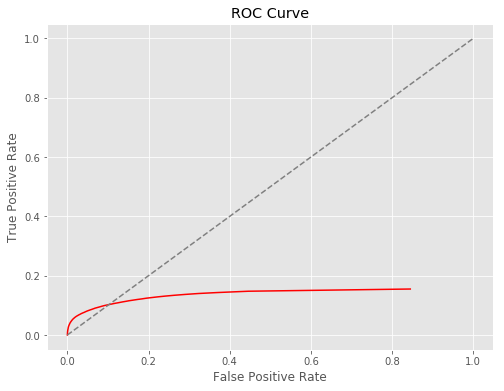

In [29]:
### ROC curve
print()
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(fp_rate, tp_rate, color = 'red')
ax.plot((0, 1), (0, 1), linestyle = 'dashed', color = 'gray')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")

plt.show()

## Features Learned

#### Layer 1

In [30]:
# Look at the weights of the first layer
layer = model.layers[1]
# this actually returns a list 
# first element is W
# second element are all the biases b
weights = layer.get_weights()
# the weights are the number of pixels times the number of filters (hidden units)
print("Shape of W")
print(weights[0].shape)

Shape of W
(3, 3, 3, 16)


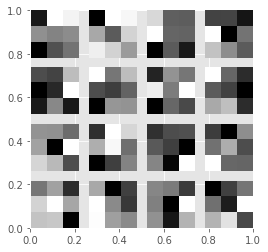

In [36]:
# get layer weights
layer = model.layers[1]
weights = layer.get_weights()

# set up plot
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(1, 1, 1)

# populate plot
index = 0
for i in range(4):
    for j in range(4):
        w = weights[0][:,:,0,index]
        w = w.reshape(3,3)
        index += 1
        ax = fig.add_subplot(4,4,index)
        ax.axis('off')
        plt.imshow(w, cmap = 'gray')    

# show plot
plt.show()